https://www.datacamp.com/tutorial/random-forests-classifier-python


In [43]:
# perform the necessary imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.metrics import recall_score, make_scorer, mean_squared_error, confusion_matrix, roc_curve, auc, accuracy_score, f1_score, roc_auc_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
# Plotting
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



In [44]:
df = pd.read_csv('/Users/andreslopez/Desktop/ECE3039/Project/survey _lung_cancer.csv')
print(df.shape)
df.head()

(309, 16)


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [45]:
nulls = df.isnull()
nulls = nulls.sum()
print('Checking for Missing values in dataset:')
print(nulls)

Checking for Missing values in dataset:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [46]:
xvalue = df.drop(['LUNG_CANCER','AGE','GENDER'], axis=1).map(lambda x: 'NO' if x == 1 else 'YES')
xvar = df[['AGE']]
xvalue = pd.concat([df['GENDER'],xvalue], axis=1)
x_label = pd.concat([df['AGE'],xvalue], axis=1)
x_label = x_label.columns
xvalue = pd.get_dummies(xvalue)
X = pd.concat([xvar,xvalue], axis=1)
X = X.astype(int)
y = df['LUNG_CANCER'].apply(lambda x: 1 if x == 'YES' else 0)
df.shape
X.head()

,AGE,GENDER_F,GENDER_M,SMOKING_NO,SMOKING_YES,YELLOW_FINGERS_NO,YELLOW_FINGERS_YES,ANXIETY_NO,ANXIETY_YES,PEER_PRESSURE_NO,...,ALCOHOL CONSUMING_NO,ALCOHOL CONSUMING_YES,COUGHING_NO,COUGHING_YES,SHORTNESS OF BREATH_NO,SHORTNESS OF BREATH_YES,SWALLOWING DIFFICULTY_NO,SWALLOWING DIFFICULTY_YES,CHEST PAIN_NO,CHEST PAIN_YES
0,69,0,1,1,0,0,1,0,1,1,...,0,1,0,1,0,1,0,1,0,1
1,74,0,1,0,1,1,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
2,59,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,1,1,0,0,1
3,63,0,1,0,1,0,1,0,1,1,...,0,1,1,0,1,0,0,1,0,1
4,63,1,0,1,0,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [47]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: LUNG_CANCER, dtype: int64

In [48]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [50]:
y_pred = rf.predict(X_test)

In [51]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    # display(graph)

In [52]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.967741935483871


In [53]:
# param_dist = {'n_estimators': randint(50,500),
#               'max_depth': randint(1,20)}


#Suggested by https://towardsdatascience.com/mastering-random-forests-a-comprehensive-guide-51307c129cb1#:~:text=n_estimators%3A%20The%20number%20of%20decision,3%2C%205%2C%20or%207.
param_dist = {'n_estimators':np.arange(50,200,15),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': [3, 5, 7, 9],
              'max_samples': [0.3, 0.5, 0.8]}

# Create a random forest classifier
rf_HPO = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf_HPO, 
                                 param_distributions = param_dist, 
                                 n_iter=15, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   param_distributions={'max_depth': [3, 5, 7, 9],
                                        'max_features': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'max_samples': [0.3, 0.5, 0.8],
                                        'n_estimators': array([ 50,  65,  80,  95, 110, 125, 140, 155, 170, 185])})

In [54]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

from sklearn.model_selection import RandomizedSearchCV as RSCV

model = RSCV(RandomForestClassifier(), param_dist, n_iter = 15).fit(x_train, y_train)
model = model.best_estimator_



rf_HPO_pred = model.predict(X_test)

Best hyperparameters: {'n_estimators': 65, 'max_samples': 0.8, 'max_features': 0.4, 'max_depth': 5}


In [55]:
hyperTuned_RF = RandomForestClassifier(
    n_estimators=rand_search.best_params_['n_estimators'],
    max_depth=rand_search.best_params_['max_depth'],
    max_features=rand_search.best_params_['max_features'],
    max_samples=rand_search.best_params_['max_samples']
    )

hyperTuned_RF.fit(x_train, y_train)
y_pred_hyperTuned = hyperTuned_RF.predict(X_test)

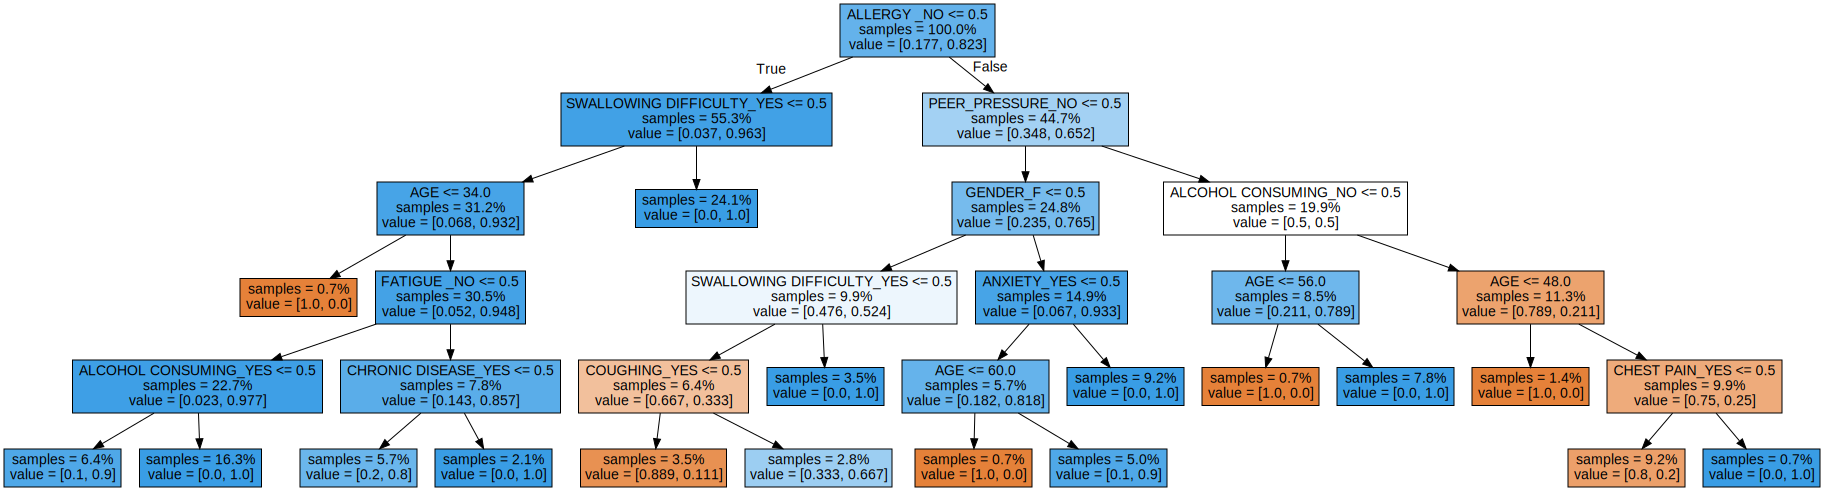

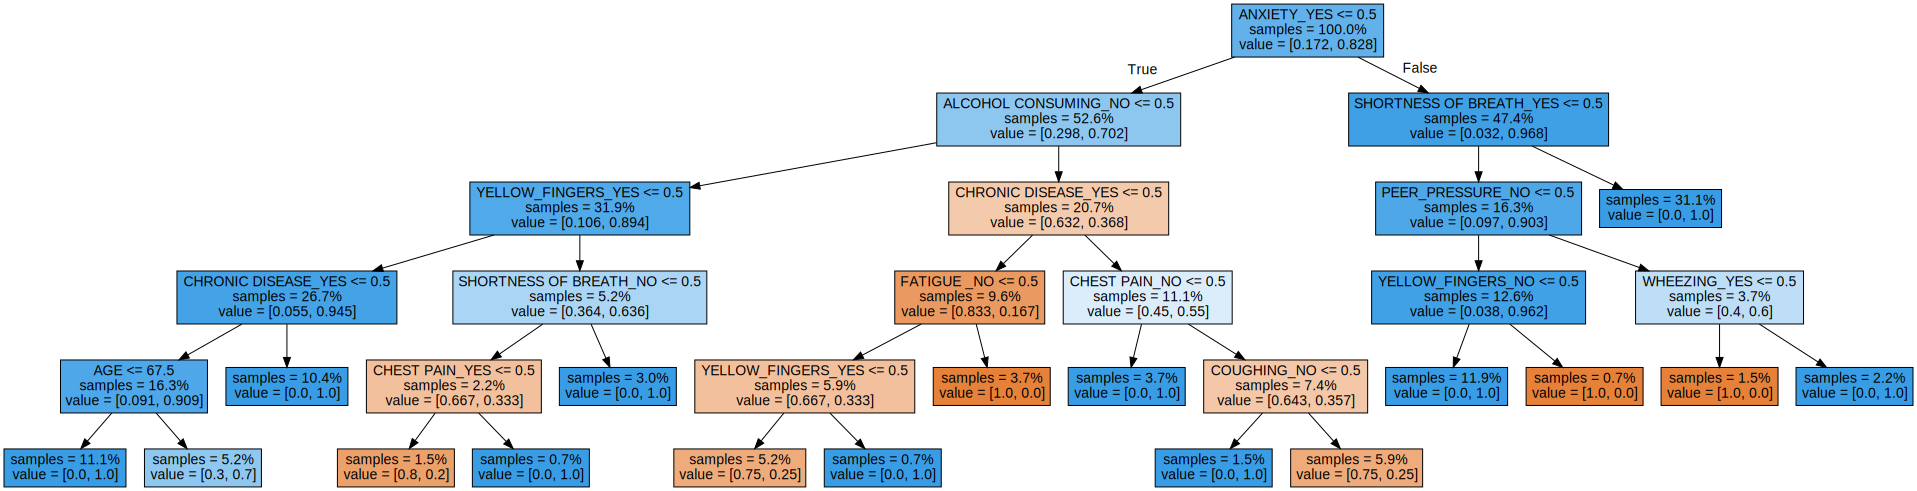

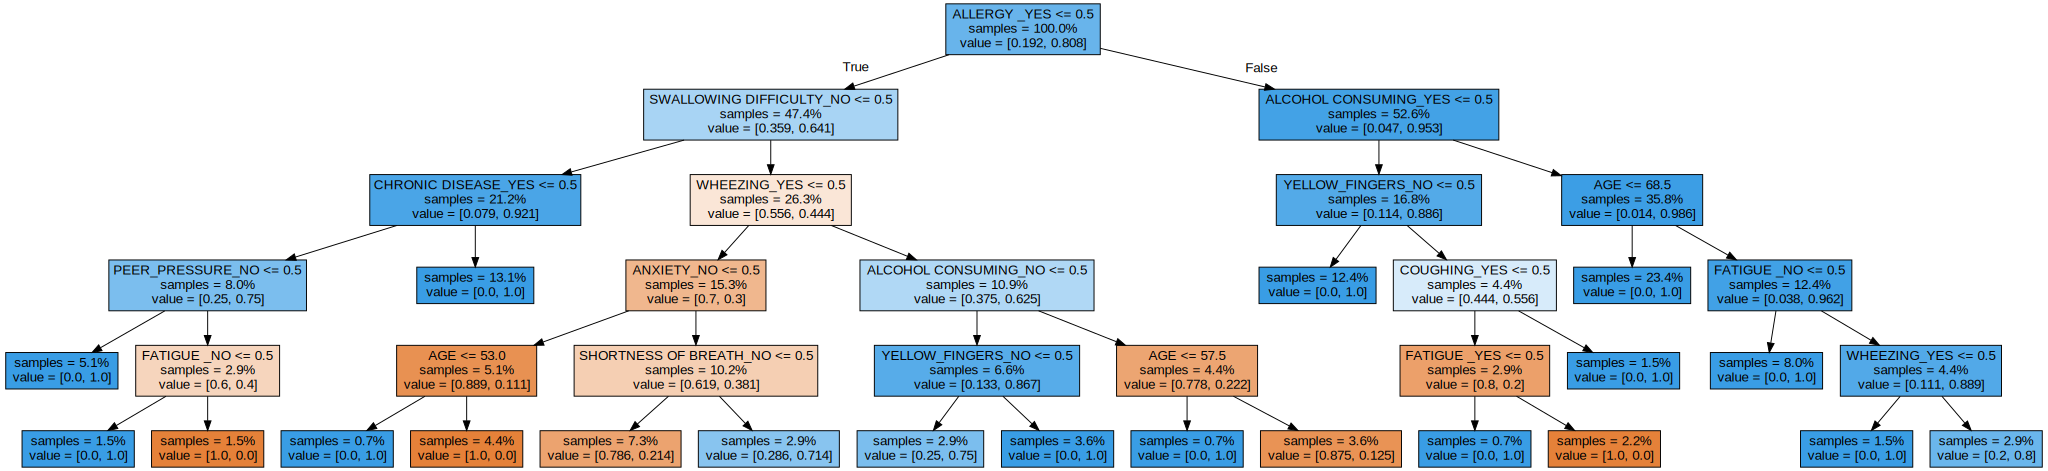

In [56]:
for i in range(3):
    tree = hyperTuned_RF.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=10, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

    # display(graph)

In [57]:
accuracy_hyperTuned = accuracy_score(y_test, y_pred_hyperTuned)
print("Accuracy HyperTuned:", accuracy_hyperTuned)
y = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
accuracy_RFO = accuracy_score(y_test, rf_HPO_pred)
print("Accuracy:", accuracy_RFO)

Accuracy HyperTuned: 0.967741935483871
Accuracy: 0.967741935483871
Accuracy: 0.967741935483871


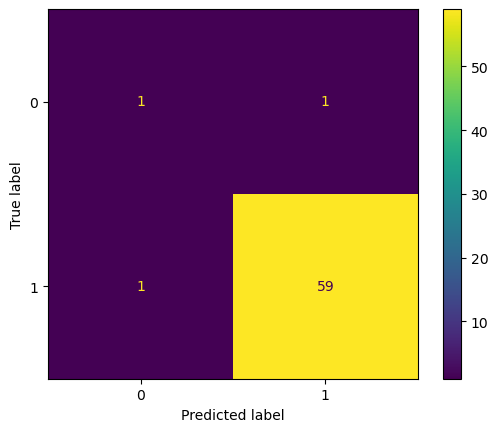


Precision: 0.9833333333333333
Recall: 0.9833333333333333
F1_score: 0.9833333333333333


In [58]:
cm = confusion_matrix(y_test, y_pred_hyperTuned)
precision = precision_score(y_test, y_pred_hyperTuned)
recall = recall_score(y_test,y_pred_hyperTuned)
f1 = f1_score(y_test,y_pred_hyperTuned)

disp = ConfusionMatrixDisplay(confusion_matrix = cm)

disp.plot()
plt.show()

print(f'\nPrecision: {precision}')
print(f'Recall: {recall}')
print(f"F1_score: {f1}")

In [59]:
#Export Model
import joblib

joblib.dump(model, 'random_forest_model.pkl')


['random_forest_model.pkl']